In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from data_preparation import DataExtractor
from utils import visualize
from nn_training import set_random_seed

set_random_seed(57)

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 16

In [2]:
data_dir = '../Data/'

extractor = DataExtractor()

for base_element in ('Ti', 'Zr'):
    files_dir = os.path.join(data_dir, base_element)
    for file in os.listdir(files_dir):
        if file.endswith('.dat'):
            extractor.read_file(files_dir, file, 2, base_element)
        elif file.endswith('.unalloyed'):
            extractor.read_file(files_dir, file, 1, base_element)
files_dir = os.path.join(data_dir, 'Ternary')
for file in os.listdir(files_dir):
    if file.endswith('.dat'):
        extractor.read_file(files_dir, file, num_elements=3, base_element='Ti')

data = extractor.dataframe

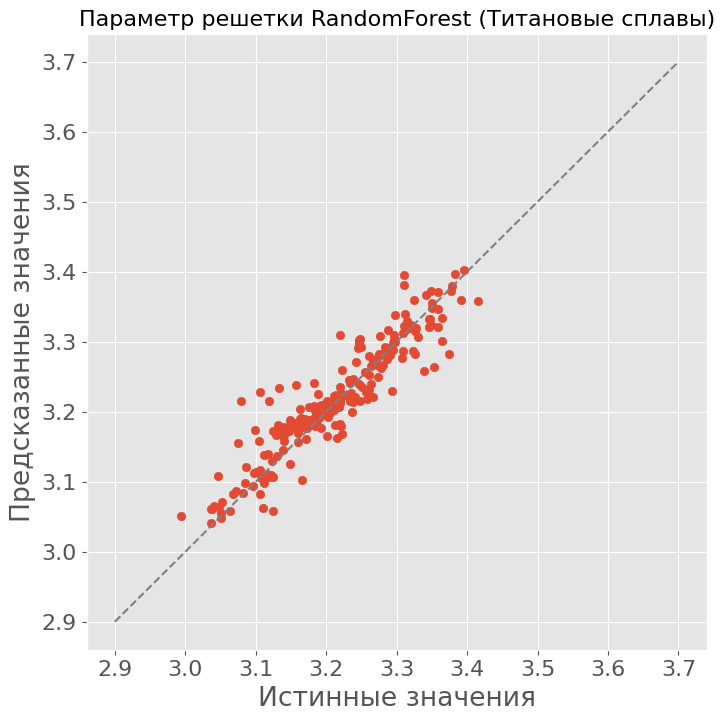

A RMSE Train: 0.018±0.000
A RMSE Test:  0.031±0.003
A R^2 Train: 0.958±0.002
A R^2 Test:  0.871±0.023


In [3]:
features = data[data.el1 == 'Ti'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Ti']['a'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    forest = RandomForestRegressor(min_samples_leaf=3, n_jobs=-1).fit(features_train, target_train)
    res_train = forest.predict(features_train)
    res_test = forest.predict(features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Параметр решетки RandomForest (Титановые сплавы)', 2.9, 3.7)
print(f"A RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"A RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"A R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"A R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

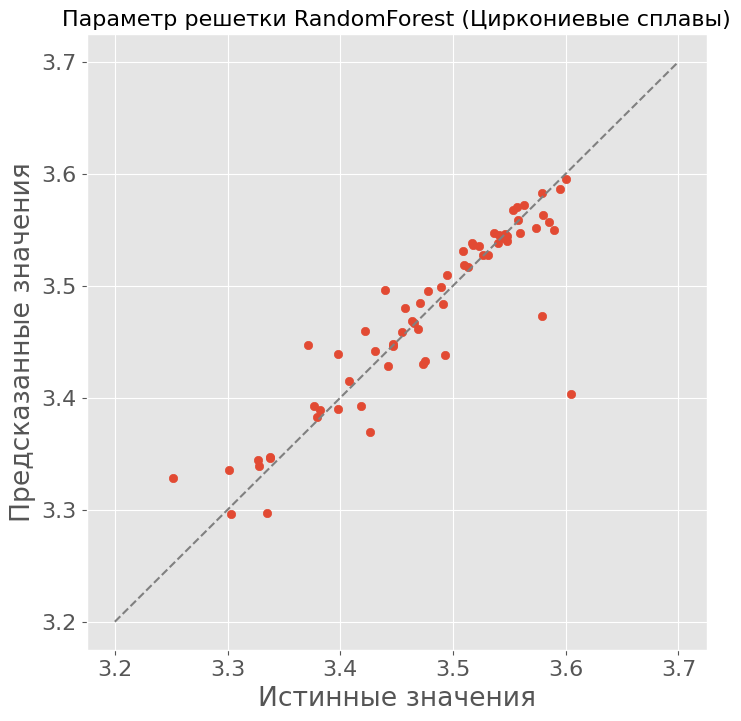

A RMSE Train: 0.023±0.001
A RMSE Test:  0.036±0.005
A R^2 Train: 0.943±0.005
A R^2 Test:  0.843±0.069


In [4]:
features = data[data.el1 == 'Zr'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Zr']['a'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    forest = RandomForestRegressor(min_samples_leaf=3, n_jobs=-1).fit(features_train, target_train)
    res_train = forest.predict(features_train)
    res_test = forest.predict(features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Параметр решетки RandomForest (Циркониевые сплавы)', 3.2, 3.7)
print(f"A RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"A RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"A R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"A R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

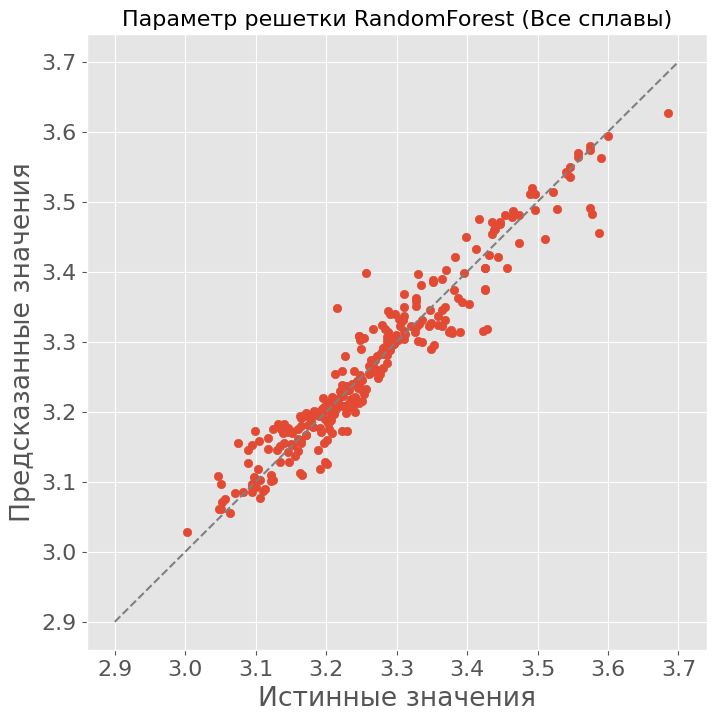

A RMSE Train: 0.020±0.000
A RMSE Test:  0.034±0.003
A R^2 Train: 0.980±0.001
A R^2 Test:  0.939±0.009


In [5]:
features = data.apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data['a'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    forest = RandomForestRegressor(min_samples_leaf=3, n_jobs=-1).fit(features_train, target_train)
    res_train = forest.predict(features_train)
    res_test = forest.predict(features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Параметр решетки RandomForest (Все сплавы)', 2.9, 3.7)
print(f"A RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"A RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"A R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"A R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

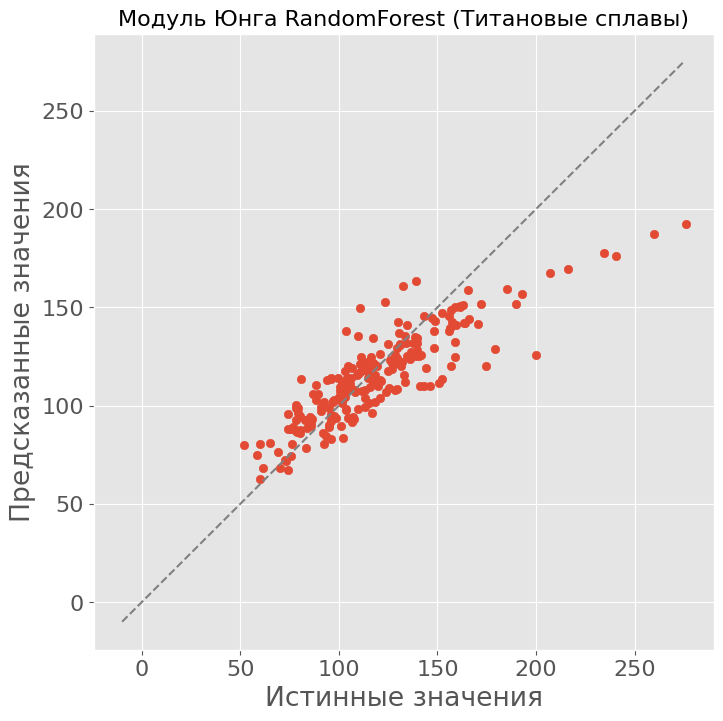

E RMSE Train: 10.030±0.222
E RMSE Test:  17.559±2.650
E R^2 Train: 0.897±0.006
E R^2 Test:  0.678±0.070


In [6]:
features = data[data.el1 == 'Ti'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Ti']['e'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    forest = RandomForestRegressor(min_samples_leaf=3, n_jobs=-1).fit(features_train, target_train)
    res_train = forest.predict(features_train)
    res_test = forest.predict(features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Модуль Юнга RandomForest (Титановые сплавы)', -10, 275)
print(f"E RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"E RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"E R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"E R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

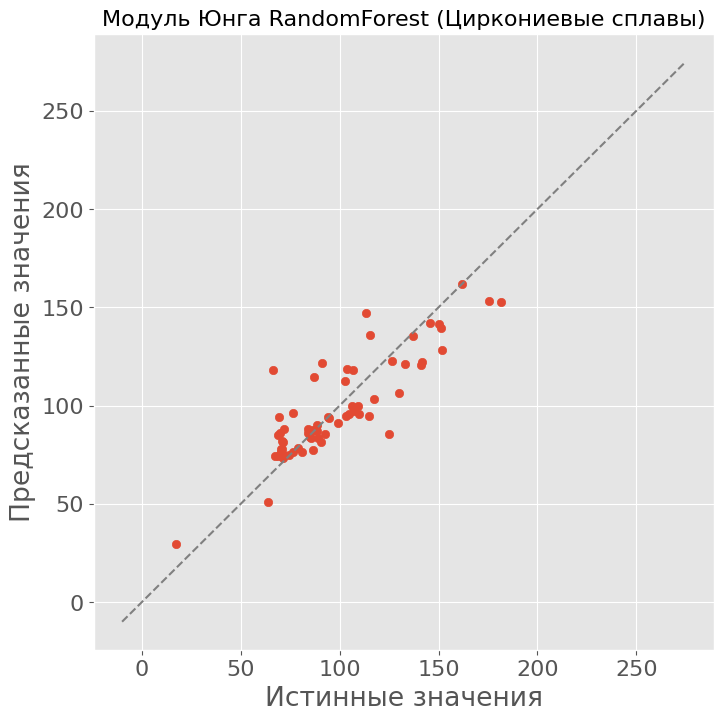

E RMSE Train: 16.523±2.431
E RMSE Test:  24.537±7.377
E R^2 Train: 0.821±0.045
E R^2 Test:  0.583±0.189


In [8]:
features = data[data.el1 == 'Zr'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Zr']['e'].to_numpy()


cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    forest = RandomForestRegressor(min_samples_leaf=3, n_jobs=-1).fit(features_train, target_train)
    res_train = forest.predict(features_train)
    res_test = forest.predict(features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Модуль Юнга RandomForest (Циркониевые сплавы)', -10, 275)
print(f"E RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"E RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"E R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"E R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

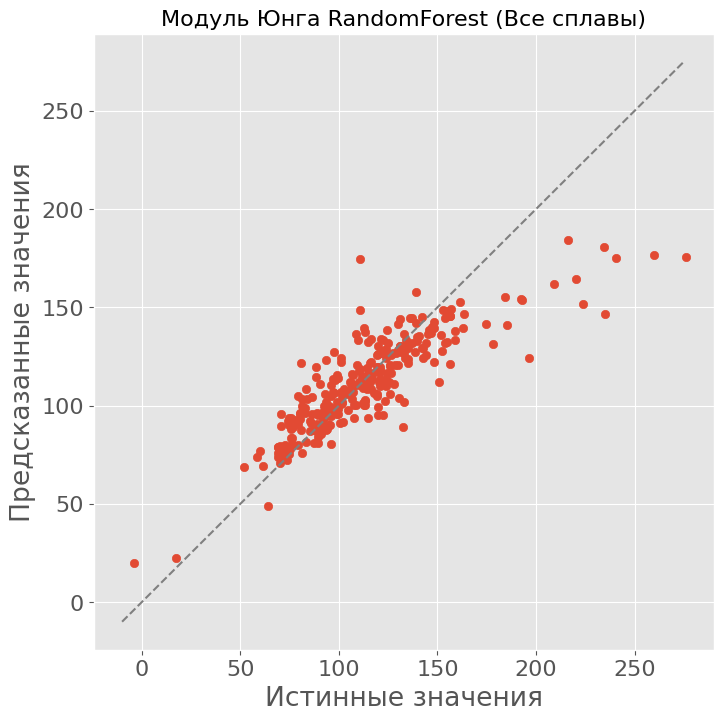

E RMSE Train: 11.784±0.842
E RMSE Test:  19.358±2.982
E R^2 Train: 0.879±0.015
E R^2 Test:  0.671±0.056


In [9]:
features = data.apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data['e'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    forest = RandomForestRegressor(min_samples_leaf=3, n_jobs=-1).fit(features_train, target_train)
    res_train = forest.predict(features_train)
    res_test = forest.predict(features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Модуль Юнга RandomForest (Все сплавы)', -10, 275)
print(f"E RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"E RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"E R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"E R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")